In [1]:
import requests
from bs4 import BeautifulSoup 

In [21]:
site = "https://query1.finance.yahoo.com/v8/finance/chart/2330.TW?period1=0&period2=1549258857&interval=1d&events=history&=hP2rOschxO0"

# 利用 requests 來跟遠端 server 索取資料
response = requests.get(site)


In [22]:
print(response.text)

{"chart":{"result":[{"meta":{"currency":"TWD","symbol":"2330.TW","exchangeName":"TAI","instrumentType":"EQUITY","firstTradeDate":946947600,"regularMarketTime":1601011801,"gmtoffset":28800,"timezone":"CST","exchangeTimezoneName":"Asia/Taipei","regularMarketPrice":424.0,"chartPreviousClose":69.649,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"CST","start":1600995600,"end":1600995600,"gmtoffset":28800},"regular":{"timezone":"CST","start":1600995600,"end":1601011800,"gmtoffset":28800},"post":{"timezone":"CST","start":1601011800,"end":1601011800,"gmtoffset":28800}},"dataGranularity":"1d","range":"","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"]},"timestamp":[946947600,947034000,947120400,947206800,947466000,947552400,947638800,947725200,947811600,948070800,948157200,948243600,948330000,948416400,948675600,948762000,948848400,948934800,949021200,949280400,949366800,949453200,949539600,949626000,949885200,949971600,950058000,950144400,950230800,9504900

In [28]:
import json
import numpy as np
import pandas as pd

data = json.loads(response.text)
df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))

In [30]:
df = pd.read_csv('file.csv', index_col='Date', parse_dates=['Date'])
df.head()

FileNotFoundError: [Errno 2] File file.csv does not exist: 'file.csv'

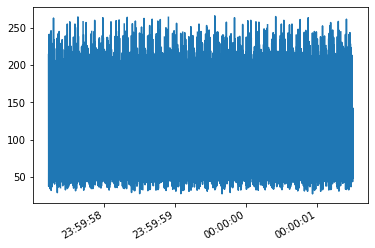

In [29]:
%matplotlib inline
df.close.plot()
